# Web Scraping I - Data formatted as a table

## Brief

Web Scraping allows us to extract data available on web sites.
Technically, it consists of reading and parsing the html code and then extracting the elements that are valuable to us. Basically, we transform the html input into an appropriate data structure to be processed.
One of the easiest cases and the one that we will deal with in this practice is the data already formatted as tables.
As an example, we will use the 'List of accidents and disasters by death toll' from Wikipedia and more specifically the table related to explosions. Clarification: This list does not include bombings, aviation incidents, or mining disasters.
Link: https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

## Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Import  and loading data

In [88]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll")
explosions = tables[4]

## Data overview

In [89]:
explosions.head(10)

,Deaths,Date,Incident
0,20000,30 May 1626,"Wanggongchang Explosion in Beijing, China in t..."
1,3000,18 August 1769,A lightning bolt caused the Brescia explosion ...
2,"3,000?",1 November 1948,Boiler and ammunition explosion aboard an unid...
3,"1,400–2,280",6 March 1862,Ammunition warehouse explodes and kills almost...
4,1950,6 December 1917,"Halifax Explosion in Nova Scotia, Canada[68]"
5,1500,8 June 1941,Ammunition plant with facilities explode at Sm...
6,"256–1,500+",September 1732,Military warehouse explodes and kills up to tw...
7,"1,300+",7 August 1956,Ammunition trucks explode near a railway stati...
8,1200,16 October 1926,Explosion of ammunition on the Chinese troopsh...
9,1121,8 June 1943,"Japanese battleship Mutsu, at Hashirajima harb..."


In [90]:
explosions.shape

(369, 3)

In [91]:
explosions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Deaths    369 non-null    object
 1   Date      369 non-null    object
 2   Incident  369 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


## Data cleansing

###  Set columns names according to row 1

In [5]:
columns_list = []
for num in range(0,explosions.shape[1]):
    columns_list.append(explosions[num][0])
    
columns_list

KeyError: 0

In [ ]:
explosions.columns = columns_list
explosions.drop(0,inplace=True)
explosions.head()

### Scrub 'Deaths' column data

#### Values formatted as a range

Since there are values that are shown as intervals, we will define 2 new columns "Deaths_min" and "Deaths_max" where we will extract the minimum and maximum range of them.

In [92]:
## Function to extract the minimum range:

def min_interval(value):
    
    if '–' in value:
        return value[:value.find('–')]
    elif ' or ' in value:
        return value[:value.find(' or ')]
    else:
        return value

min_interval('1,400–2,280')

'1,400'

In [93]:
## Function to extract the maximum range:

def max_interval(value):
    
    if '–' in value:
        return value[value.find('–')+1:]
    elif ' or ' in value:
        return value[value.find(' or ')+1:]
    else:
        return value

max_interval('1,400–2,280')

'2,280'

In [94]:
## New columns creation with the 2 functions:

explosions['Deaths_min'] = explosions['Deaths'].apply(min_interval)
explosions['Deaths_max'] = explosions['Deaths'].apply(max_interval)
explosions.sample(10)

,Deaths,Date,Incident,Deaths_min,Deaths_max
238,16,24 February 1978,"Waverly, Tennessee, tank car explosion, United...",16,16
17,700,17 August 1989,Iraqi military plant with facilities explode a...,700,700
324,8,9 September 2010,"2010 San Bruno pipeline explosion, a natural g...",8,8
299,10,10 May 1962,Maumee Chemical Company plant explosion in Tol...,10,10
347,6,21 October 1980,"Amoco chemical plant explosion in New Castle, ...",6,6
53,166,28 November 2004,"Chenjiashan, Tongchuan, Shaanxi, China",166,166
271,12,21 November 1923,"Vida Sugar refinery explosion in New Iberia, L...",12,12
131,50+,2 July 2019,Fuel tanker exploded after overturning in Benu...,50+,50+
341,6,11 February 1958,Reynolds Metals Company plant explosion in McC...,6,6
286,11,27 May 1983,Benton fireworks disaster at illegal fireworks...,11,11


#### Remove non-numeric characters:

In [95]:
# Function to remove non-numeric characters

def erase_char(value):
    result = ""
    for char in value:
        if char.isnumeric():
            result += char
    return result
            
erase_char("327(estimate)")

'327'

In [96]:
## New columns creation with the function:

explosions['Deaths_min_clean']=pd.to_numeric(explosions['Deaths_min'].apply(erase_char))
explosions['Deaths_max_clean']=pd.to_numeric(explosions['Deaths_max'].apply(erase_char))
explosions.sample(10)

,Deaths,Date,Incident,Deaths_min,Deaths_max,Deaths_min_clean,Deaths_max_clean
131,50+,2 July 2019,Fuel tanker exploded after overturning in Benu...,50+,50+,50,50
242,15,14 June 1926,Illinois Steel Company coke oven explosion in ...,15,15,15,15
257,14,7 February 2008,2008 Georgia sugar refinery explosion (Port We...,14,14,14,14
26,372,11 December 1944,Ammunition ship USS Mount Hood exploded at See...,372,372,372,372
294,10,3 June 1942,Stockton Army Air Corps Advanced Flying School...,10,10,10,10
261,13,30 July 1947,"Beauty parlor explosion in Harrisonburg, Virgi...",13,13,13,13
108,78,12 October 1978,Greek tanker Spyros exploded at Jurong shipyar...,78,78,78,78
13,"1,000+",31 August 1794,"Explosion of a gunpowder factory in Grenelle, ...","1,000+","1,000+",1000,1000
33,235+,29 December 2001,"Fireworks stand explosion in Lima, Peru. 235 b...",235+,235+,235,235
104,90,24 June 2004,"A truck carrying 3,800 gallons of gasoline wit...",90,90,90,90


## Data analysis

Our data are ready to work with them. For instance, let is calculate how many people died in accidental explosions per decade in the XX century.

### Create 'Century' and 'Decade' column from 'Date'

In [97]:
explosions['Century'] = explosions['Date'].str[-4:-2]

In [98]:
explosions['Decade'] = explosions['Date'].str[-2:-1]

In [99]:
explosions.sample(5)

,Deaths,Date,Incident,Deaths_min,Deaths_max,Deaths_min_clean,Deaths_max_clean,Century,Decade
310,9,11 May 2004,Stockline Plastics factory explosion in Glasgo...,9,9,9,9,20,0
14,843,9 July 1917,Propellant explosion of the British dreadnough...,843,843,843,843,19,1
356,5,6 March 1955,"Wieboldt's Bakery explosion in River Forest, I...",5,5,5,5,19,5
76,117,3 June 2010,"Electrical transformer explosion in Dhaka, Ban...",117,117,117,117,20,1
152,41,6 April 1968,"Richmond, Indiana explosion; more than 150 wer...",41,41,41,41,19,6


### Filter the 20th century and save the results into a new dataframe

In [100]:
twenty_century = explosions[explosions['Century']=='19']
twenty_century.sample(5)


,Deaths,Date,Incident,Deaths_min,Deaths_max,Deaths_min_clean,Deaths_max_clean,Century,Decade
345,6,22 February 1976,Goodpasture grain elevator explosion in Galena...,6,6,6,6,19,7
222,19,9 May 1930,Armour meat processing plant explosion in St. ...,19,19,19,19,19,3
314,8,1 May 1942,Central Railways Signal Company explosion in V...,8,8,8,8,19,4
159,37,13 April 1928,"Dance Hall explosion in West Plains, Missouri,...",37,37,37,37,19,2
289,10+,9 October 1927,"Kimberly Clark mill explosion in Kimberly, Wis...",10+,10+,10,10,19,2


In [101]:
twenty_century.shape


(275, 9)

### Group by 'Decades' and add the number of deaths for each of them

In [102]:
deaths_per_decade_XX = twenty_century.groupby(twenty_century['Decade'].str[0])[['Deaths_min_clean','Deaths_max_clean']].sum()
deaths_per_decade_XX

,Deaths_min_clean,Deaths_max_clean
Decade,,
0,1247,1247
1,6142,6142
2,2866,2866
3,1001,1001
4,11366,11366
5,1750,1750
6,477,477
7,871,872
8,2972,2972


### Plot results

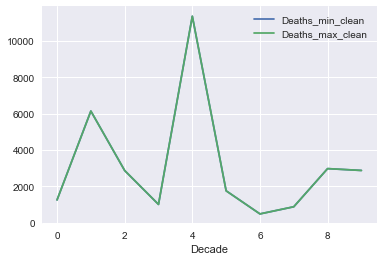

In [103]:
deaths_per_decade_XX.plot()

# THANK YOUR FOR FOLLOWING

If you have any question, do not hesitate to contact me on Linkedin: https://www.linkedin.com/in/laurajmoreno/